### Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

train_data = pd.read_csv('train.csv')

X = train_data.drop(['id', 'Diabetes'], axis=1)  # Drop irrelevant columns
y = train_data['Diabetes']

y = y.map({'No': 0, 'Yes': 1})


categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['float64']).columns.tolist()

numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing numerical values with mean
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

X_preprocessed = preprocessor.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

### Models

In [2]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_log = log_reg.predict(X_val)
y_proba_log = log_reg.predict_proba(X_val)[:, 1]

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_val, y_pred_log))
print("ROC AUC:", roc_auc_score(y_val, y_proba_log))
print(classification_report(y_val, y_pred_log))

Logistic Regression Results:
Accuracy: 0.6635160680529301
ROC AUC: 0.7255520679519394
              precision    recall  f1-score   support

           0       0.69      0.78      0.73      1249
           1       0.61      0.50      0.55       867

    accuracy                           0.66      2116
   macro avg       0.65      0.64      0.64      2116
weighted avg       0.66      0.66      0.66      2116



In [3]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_clf.predict(X_val)
y_proba_rf = rf_clf.predict_proba(X_val)[:, 1]

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_val, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_val, y_proba_rf))
print(classification_report(y_val, y_pred_rf))


Random Forest Results:
Accuracy: 0.6488657844990549
ROC AUC: 0.6992537513286292
              precision    recall  f1-score   support

           0       0.68      0.76      0.72      1249
           1       0.59      0.49      0.53       867

    accuracy                           0.65      2116
   macro avg       0.63      0.62      0.63      2116
weighted avg       0.64      0.65      0.64      2116



In [4]:
#SVM
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_clf.predict(X_val)
y_proba_svm = svm_clf.predict_proba(X_val)[:, 1]

print("SVM Results:")
print("Accuracy:", accuracy_score(y_val, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_val, y_proba_svm))
print(classification_report(y_val, y_pred_svm))

SVM Results:
Accuracy: 0.6677693761814745
ROC AUC: 0.7242047386467421
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1249
           1       0.61      0.52      0.56       867

    accuracy                           0.67      2116
   macro avg       0.65      0.65      0.65      2116
weighted avg       0.66      0.67      0.66      2116



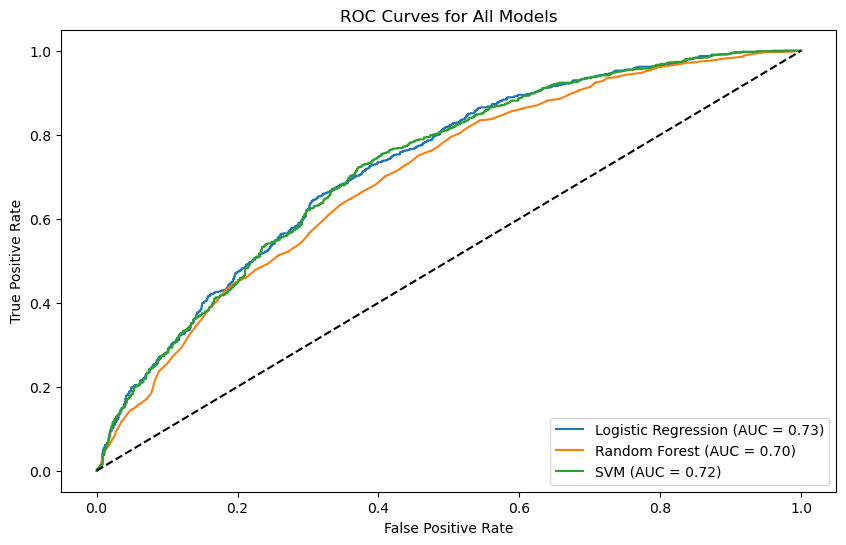

In [5]:
#PERFORMANCE COMPARISON
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Plot ROC curves
plt.figure(figsize=(10, 6))

def plot_roc(y_val, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_val, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plot_roc(y_val, y_proba_log, 'Logistic Regression')
plot_roc(y_val, y_proba_rf, 'Random Forest')
plot_roc(y_val, y_proba_svm, 'SVM')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.show()